# Crash Carts Lab
## PH 211 COCC
### Bruce Emerson 24/1/2020

This notebook is meant to provide tools and discussion to support data analysis and presentation as you generate your lab reports. 

[Crash Carts Lab](http://coccweb.cocc.edu/bemerson/PhysicsGlobal/Courses/PH211/PH211Materials/PH211Labs/PH211LabCrashCarts.html) 

In this lab we are gathering some data to describe the movement of a cart down the hallway. Along the way we are experiencing some features of Newton's 1st and 2nd Laws. Ultimately you will be asked to apply your understanding of the plots and the measured uncertainties to a challenge problem.

For the formal lab report you will want to create your own description of what you understand the process and intended outcome of the lab is. Please don't just copy the purpose statement from the lab page.

### Dependencies

This is where we load in the various libraries of python tools that are needed for the particular work we are undertaking.  
  
```numpy``` is a numerical tools library - often imported as np. ```numpy``` also contains the statistical tools that we will use in this lab. There are other libraries dedicated to statistical tools but 'numpy' has everything we need.  
```matplotlib```is a 'MATLAB like' library. 
```matplotlib.pyplot``` is often imported as ```plt``` to make it easier to use. ```matplotlib``` has the plotting tools that we need for this lab.  

The following code cell will need to be run first before any other code cells.

In [32]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.patches as patch


## Data and Models

As we have talked about in previous labs data that we gather for physics labs will usually be entered manually into a 'list'. In this lab we will be using tools from the Data/Meaning Lab to assess our data and it's variability and then using the ideas of modeling from the Bungee Characterization Lab to create a physics model of our group's cart and it's behavior.

The request in the lab is that you 'train' to be able to push a kinematics cart down the hallway at a constant speed. Remember that the pusher will be blindfolded for the actuall challenge so it would be good to practice that same way. Before being allowed to proceed to the modeling part of the lab you must show that you have a reasonable grasp of the variability of the speed of your cart. 

Notice in the second print statement I have to use %% to get the % sign to print. % is a control character so it needs special handling. The %.3f tells the print statement to report the variable with 3 decimal points. Helps keep calculation trash to a minimum.

In [26]:
speeddata = [1.24,1.27,1.30,1.15]
speedmean = np.mean(speeddata)
speedsigma = np.std(speeddata)
variability = 100.*speedsigma/speedmean
# 2 ways to print out and check your data
print("Our average speed is %.3f m/s with a standard deviation of %.3f." % (speedmean,speedsigma))
print("Our variability is %.2f%%" % variability)

Our average speed is 1.240 m/s with a standard deviation of 0.056.
Our variability is 4.53%


### Model your cart

Each group will have three models for their cart. Their average model along with their $\pm 1\sigma$ models. This allows us to consider the range of possible outcomes of the challenge.

Each model starts at \[0,0\]for the same range of t values ```modelx = np.linspace(0.,10.,20)``` where the x values are linearly distributed from 0 to some time (10. in this case) with some number of values (20 in this case).

In [54]:
# actual model parameters - slope and intercept
slope1ave = speedmean
slope1plus = speedmean+speedsigma
slope1minus = speedmean-speedsigma
modelint = 0.

# range of t values -- choose lower and upper limits of range
modelx = np.linspace(0.,10.,20)

# generate y values from model
model1avey = slope1ave*modelx + modelint
model1plusy = slope1plus*modelx + modelint
model1minusy = slope1minus*modelx + modelint

### Plot

Look to the Bungee lab for references about plotting if you need reminders (I do).


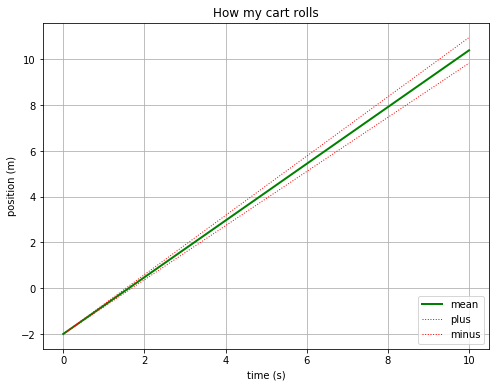

In [43]:
fig2, ax2 = plt.subplots()

ax2.plot(modelx, model1avey, color = 'green', linestyle = '-', linewidth = 2., label = "mean")
ax2.plot(modelx, model1plusy, color = 'red', linestyle = ':', linewidth = 1., label = "plus")
ax2.plot(modelx, model1minusy, color = 'red', linestyle = ':', linewidth = 1., label = "minus")
ax2.set(xlabel='time (s)', ylabel='position (m)',
       title='How my cart rolls')
ax2.grid()
fig2.set_size_inches(8, 6)
plt.legend(loc= 4)
plt.show()

### Our Collaborators

To resolve the challenge you will need to enter the data that describes the carting of the group you are collaborating with to solve the challenge. 

To show the window that the two carts must pass within I needed to plot a patch representing that distance. Here is a resource I used to figure out how to use the ```matplotlib.patches``` library to do so.

[patches](https://www.programcreek.com/python/example/94511/matplotlib.patches) 
[patches.Rectangle](https://matplotlib.org/api/_as_gen/matplotlib.patches.Rectangle.html#matplotlib.patches.Rectangle)

I also included a scatter plot to indicate the point at which the cart which must delay it's start begins.

[managing marker size](https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size)

[no fill in marker](https://stackoverflow.com/questions/4143502/how-to-do-a-scatter-plot-with-empty-circles-in-python)


In [44]:
speed2data = [0.65,.75,.83,.72]
speed2mean = np.mean(speed2data)
speed2sigma = np.std(speed2data)
variability2 = 100.*speed2sigma/speed2mean
# 2 ways to print out and check your data
print("Our collaborators average speed is %.3f m/s with a standard deviation of %.3f." % (speed2mean,speed2sigma))
print("Our collaborators variability is %.2f%%" % variability2)

Our collaborators average speed is 0.738 m/s with a standard deviation of 0.065.
Our collaborators variability is 8.75%


In [78]:
# actual model parameters - slope and intercept
slope2ave = speed2mean
slope2plus = speed2mean+speed2sigma
slope2minus = speed2mean-speed2sigma
model2int = 2.

# regenerate y values from model with potential different intercept
modelint = -3.5
model1avey = slope1ave*modelx + modelint
model1plusy = slope1plus*modelx + modelint
model1minusy = slope1minus*modelx + modelint

# no need to generate t values since the model can use the same values
# range of t values -- choose lower and upper limits of range
#modelx = np.linspace(0.,10.,20)

# generate y values from model
model2avey = slope2ave*modelx + model2int
model2plusy = slope2plus*modelx + model2int
model2minusy = slope2minus*modelx + model2int

### Multiple Repesentations

You will find that you can figure out an answer to the challenge problem without using the plot. My requirement is that you have to support your answer with a plot. There is intrinsic value in learning how to use different tools to represent the problem and each of them gives another perspective. I found this challenging and you are likely to as well.

Here's the challenge represented by this plot. The intersection of the two paths is 6 m from one starting point and 8 meters from the other. The slow cart has drawn the straw that says they must pass in front of the fast group. At the intersection point the carts can be no more than 1 m apart. 

Think about how the plot shows this solution. Consider also what would happen if the fast group tended towards their fast side and the slow group towards the low end. What does the intersection of the two lines after they get to target point mean? What if you had to reverse the order of arrival at the target?

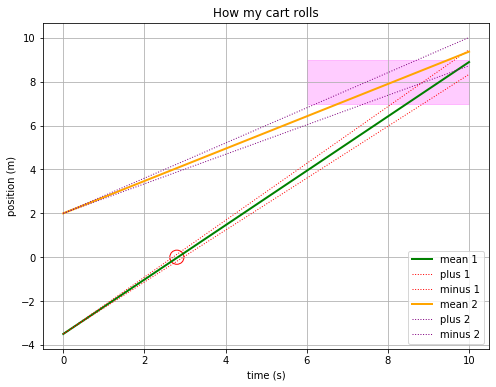

In [81]:
fig3, ax3 = plt.subplots()

# model for cart 1
ax3.plot(modelx, model1avey, color = 'green', linestyle = '-', linewidth = 2., label = "mean 1")
ax3.plot(modelx, model1plusy, color = 'red', linestyle = ':', linewidth = 1., label = "plus 1")
ax3.plot(modelx, model1minusy, color = 'red', linestyle = ':', linewidth = 1., label = "minus 1")

# model for cart 2
ax3.plot(modelx, model2avey, color = 'orange', linestyle = '-', linewidth = 2., label = "mean 2")
ax3.plot(modelx, model2plusy, color = 'purple', linestyle = ':', linewidth = 1., label = "plus 2")
ax3.plot(modelx, model2minusy, color = 'purple', linestyle = ':', linewidth = 1., label = "minus 2")

# start point for delayed cart
ax3.scatter(2.8, 0., s= 200, marker = 'o', facecolors = 'none', edgecolors = 'red')

target = patch.Rectangle((6., 7.), width=4, height=2.,
                             color='magenta',
                             alpha=0.2)

ax3.add_patch(target)

ax3.set(xlabel='time (s)', ylabel='position (m)', title='How my cart rolls')
ax3.grid()
fig3.set_size_inches(8, 6)
plt.legend(loc= 4)
plt.show()

### Analysis I

This is for your analysis of the plot and how it was verified (or not) by your experimental demonstration. 

### Reflection

I hate to say it but this was fun figuring out how to do this in python. It creates much more meaningful plots and requires me to think more clearly about what the plots, intersections, and data variability mean. Got a few more useful plotting experiences into the bargin. 

### Extensions

Extensions are ideas that I didn't have time to explore or develop fully for this lab. These are offered as opportunities for students with more programming experience than is typical for students in the class.

#### Separate legend for the scatter plot circle that marks the start time

That would be nice to be able to label it separately and not just a part of the standard legend
